# Model Performance Analysis for Image Classification (CIFAR-10 Dataset)

### Introduction

In the era of **deep learning** and **computer vision**, image classification tasks play a pivotal role in various domains such as healthcare, autonomous vehicles, security, and more. With the advancement of neural network architectures and machine learning algorithms, numerous models have been developed to tackle image classification challenges with increasing accuracy and efficiency.

The goal of our project, **Model Performance Analysis for Image Classification** is to comprehensively evaluate and compare the performance of different models on image classification tasks. We explore the effectiveness of **`Support Vector Machines (SVMs)`**, **`Decision Trees`**, **`Convolutional Neural Networks (CNNs)`**, and transfer learning-based models like **`MobileNet`** in accurately classifying images from the popular **CIFAR-10 dataset**.


Our project utilizes a range of Python libraries for machine learning and deep learning tasks. 
> - `NumPy` provides fundamental support for numerical operations and data manipulation, while Matplotlib enables the creation of various types of plots for visualizing results. 
> - `Scikit-learn`'s modules, including svm, metrics, tree, and model_selection, offer implementations of machine learning algorithms, evaluation metrics, and tools for model selection and evaluation. StandardScaler from scikit-learn preprocesses data by standardizing features. 
> - The `keras` library is leveraged for working with deep learning models, with Sequential providing a linear stack of layers, and layers offering various types of neural network layers. Additionally, keras.utils facilitates data manipulation tasks like one-hot encoding. 
> - `TensorFlow`'s Keras API provides access to pre-trained deep learning models like ResNet50, and the optimizer Adam, which adjusts the learning rate during training. 
These are the most important libraries we have used. These imports collectively enable data preprocessing, model building, training, evaluation, and visualization in the project.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import utils
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

Now, we will load our CIFAR-10 dataset, which comprises **60,000 32x32** color images categorized into **10 classes**, with **each class containing 6,000 images**. Then, we will print the shapes of both the training and test sets, shedding light on the dimensions of our data while also visualizing a selection of 25 images from the training set, each accompanied by its corresponding class label. 
These visualizations, arranged in a 5x5 grid format, will allow us to grasp a quick overview of the dataset's contents and structure, aiding in our understanding of the CIFAR-10 dataset and providing initial insights into its characteristics.

Training set (images) shape: (50000, 32, 32, 3)
Training set (labels) shape: (50000, 1)
Test set (images) shape: (10000, 32, 32, 3)
Test set (labels) shape: (10000, 1)


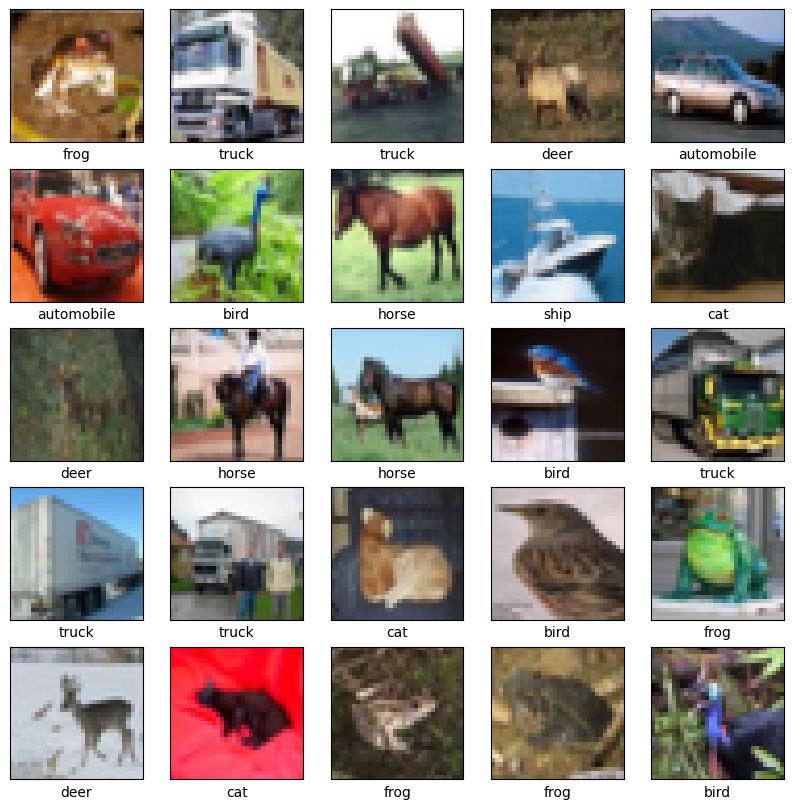

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

# Let's visualize some images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


## Basic Data Preprocessing and Exploration

We begin by normalizing the data for our deep learning models. This involves converting the pixel values of both the training and test sets to floating-point numbers between 0 and 1 by dividing them by 255, which is the maximum pixel value. 

Additionally, we perform one-hot encoding on the class labels using the `utils.to_categorical()` function from Keras, converting them into binary categorical matrices for compatibility with deep learning models.

For preprocessing aimed at the SVM and Decision Tree models, we define a function called `grayscale()`. 
This function converts the RGB images to grayscale by applying a weighted sum of the RGB channels. Afterward, the images are flattened to one-dimensional arrays to facilitate compatibility with these models. We then apply standard scaling using `StandardScaler()` from scikit-learn to standardize the grayscale images' features, ensuring that each feature has a mean of 0 and a standard deviation of 1 across the dataset. This preprocessing step enhances the models' performance by ensuring uniform feature scaling.

In [8]:
# Normalize data for deep learning models
x_train_dl = x_train.astype('float32') / 255
x_test_dl = x_test.astype('float32') / 255
y_train_dl = utils.to_categorical(y_train, 10)
y_test_dl = utils.to_categorical(y_test, 10)

# Preprocessing for SVM and Decision Tree: flatten and grayscale
def grayscale(data, width=32, height=32):
    return np.dot(data[...,:3], [0.299, 0.587, 0.114]).reshape(-1, width*height)

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)
scaler = StandardScaler()
x_train_gray = scaler.fit_transform(x_train_gray)
x_test_gray = scaler.transform(x_test_gray)

We start by initializing an empty dictionary `class_counts` to store the count of samples for each class. Then, we iterate over the class names using a for loop, and for each class, we calculate the total number of samples by counting the non-zero elements in the concatenated arrays `y_train` and `y_test` where the values are equal to the class index `i`. These counts are then stored in the `class_counts` dictionary with the corresponding class name as the key.

After computing the counts for all classes, we iterate over the items in the `class_counts` dictionary using another for loop. For each class name and count pair, we print the number of samples for that class using an f-string format, providing a clear and concise summary of the distribution of samples across the different classes in the dataset. This information is crucial for understanding the dataset's class balance and can influence model training and evaluation strategies.

In [9]:
class_counts = {}
for i in range(len(class_names)):
    class_count = np.count_nonzero(np.concatenate([y_train, y_test]) == i)
    class_counts[class_names[i]] = class_count

for class_name, count in class_counts.items():
    print(f'Number of samples for {class_name} class are : {count}')

Number of samples for airplane class are : 6000
Number of samples for automobile class are : 6000
Number of samples for bird class are : 6000
Number of samples for cat class are : 6000
Number of samples for deer class are : 6000
Number of samples for dog class are : 6000
Number of samples for frog class are : 6000
Number of samples for horse class are : 6000
Number of samples for ship class are : 6000
Number of samples for truck class are : 6000


### Plotting Distribution of Classes in Training and Testing Sets

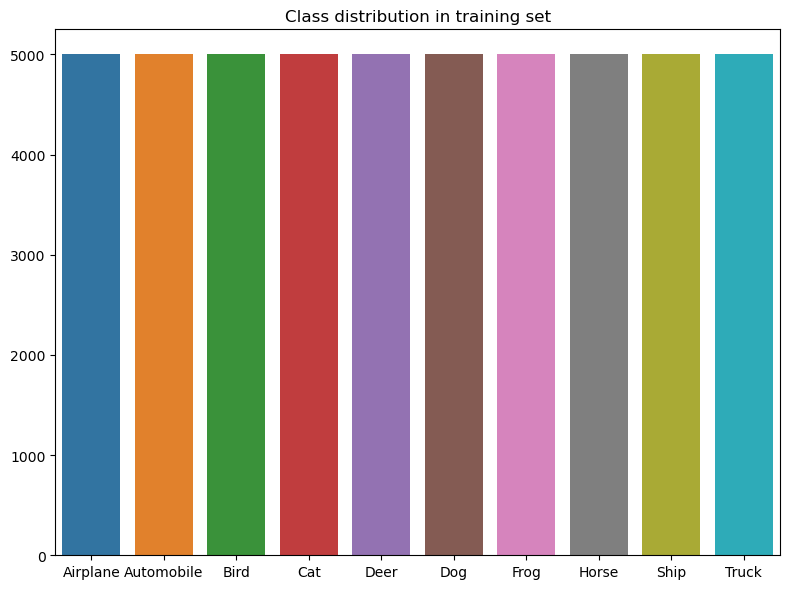

In [10]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
classes, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=classes_name, y=counts)
plt.title('Class distribution in training set')
plt.tight_layout()
plt.show()

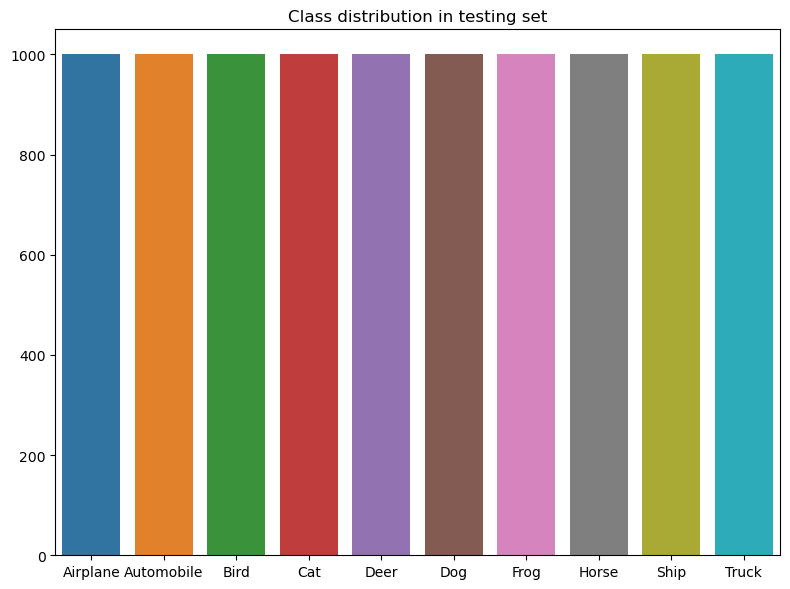

In [11]:
plt.figure(figsize=(8,6))
classes, counts = np.unique(y_test, return_counts=True)
sns.barplot(x=classes_name, y=counts)
plt.title('Class distribution in testing set')
plt.tight_layout()
plt.show()

In [ ]:
########################################### Models ###########################################

## Reprocessing the data in preparation for the models

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import utils
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data for deep learning models
x_train_dl = x_train.astype('float32') / 255
x_test_dl = x_test.astype('float32') / 255
y_train_dl = utils.to_categorical(y_train, 10)
y_test_dl = utils.to_categorical(y_test, 10)

# Preprocessing for SVM and Decision Tree: flatten and grayscale
def grayscale(data, width=32, height=32):
    return np.dot(data[...,:3], [0.299, 0.587, 0.114]).reshape(-1, width*height)

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)
scaler = StandardScaler()
x_train_gray = scaler.fit_transform(x_train_gray)
x_test_gray = scaler.transform(x_test_gray)


## Model 1 - SVM (Support Vector Machine)

Now, we construct an SVM (Support Vector Machine) model using the `svm.SVC()` function from scikit-learn, specifying a linear kernel. The, we move on to hyperparameter tuning using grid search cross-validation (`GridSearchCV`) to identify the optimal combination of hyperparameters. 

>### Why is Hyperparameter Tuning needed?
Hyperparameter tuning using grid search cross-validation is essential for optimizing machine learning models' performance by systematically exploring various hyperparameter combinations and selecting the set that yields the best results. This process helps fine-tune models to achieve optimal accuracy, precision, recall, and other performance metrics on unseen data. By selecting hyperparameters that generalize well across different datasets, grid search cross-validation ensures robustness and prevents overfitting, where models memorize noise in the training data. Furthermore, it maximizes the efficient use of available data by partitioning it into multiple training and validation sets, leading to more reliable performance estimates.

So, continuing, our grid search spans across various values of the regularization parameter `C` and kernel types, including both linear and radial basis function (`rbf`) kernels. To expedite the process, we limit the training dataset to the first 10,000 samples. Following the grid search, we evaluate the trained SVM model's performance on the test dataset (`x_test_gray`). Leveraging `metrics.classification_report()`, we generate a comprehensive classification report, getting precision, recall, F1-score, and support metrics for each class. This report provides invaluable insights into the SVM model's proficiency across diverse categories within the CIFAR-10 dataset.

In [14]:
# Create SVM model
svm_model = svm.SVC(kernel='linear')

# Hyperparameter tuning (this might take a long time)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(svm_model, param_grid, cv=3)
grid.fit(x_train_gray[:10000], y_train.ravel()[:10000])  # Reduce data size to speed up

# Evaluate the model
predicted = grid.predict(x_test_gray)
print("Classification report for SVM:\n%s\n" % (metrics.classification_report(y_test, predicted)))


Classification report for SVM:
              precision    recall  f1-score   support

           0       0.41      0.32      0.36      1000
           1       0.49      0.46      0.47      1000
           2       0.29      0.36      0.32      1000
           3       0.29      0.23      0.25      1000
           4       0.33      0.34      0.33      1000
           5       0.42      0.29      0.35      1000
           6       0.37      0.49      0.42      1000
           7       0.49      0.40      0.44      1000
           8       0.43      0.57      0.49      1000
           9       0.46      0.49      0.47      1000

    accuracy                           0.39     10000
   macro avg       0.40      0.39      0.39     10000
weighted avg       0.40      0.39      0.39     10000




## Model 2 - Decision Tree

Now, we proceed to construct a Decision Tree model using the `tree.DecisionTreeClassifier()` function from scikit-learn. Following this, we engage in hyperparameter tuning to identify the optimal hyperparameters for our Decision Tree model. Using grid search cross-validation (`GridSearchCV`), we explore various combinations of hyperparameters, including the maximum depth of the tree (`max_depth`) and the criterion for splitting (`criterion`), which can be either 'gini' or 'entropy'. Similar to the SVM model, we limit the training dataset to the first 10,000 samples to expedite the process. Subsequently, we evaluate the performance of the tuned Decision Tree model on the test dataset (`x_test_gray`). Utilizing `metrics.classification_report()`, we generate a detailed classification report, providing insights into the model's precision, recall, F1-score, and support metrics across different classes. This report enables us to gauge the effectiveness of the Decision Tree model in accurately classifying images within the CIFAR-10 dataset.

In [27]:
# Create Decision Tree model
tree_model = tree.DecisionTreeClassifier()

# Hyperparameter tuning
param_grid = {'max_depth': [10, 20, 30], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(tree_model, param_grid, cv=3)
grid.fit(x_train_gray[:10000], y_train.ravel()[:10000])  # Reduce data size to speed up

# Evaluate the model
predicted = grid.predict(x_test_gray)
print("Classification report for Decision Tree:\n%s\n" % (metrics.classification_report(y_test, predicted)))


Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.25      0.24      0.24      1000
           1       0.25      0.15      0.19      1000
           2       0.20      0.23      0.21      1000
           3       0.18      0.16      0.17      1000
           4       0.18      0.20      0.19      1000
           5       0.25      0.17      0.20      1000
           6       0.17      0.30      0.22      1000
           7       0.23      0.16      0.19      1000
           8       0.27      0.36      0.31      1000
           9       0.30      0.24      0.27      1000

    accuracy                           0.22     10000
   macro avg       0.23      0.22      0.22     10000
weighted avg       0.23      0.22      0.22     10000




## Model 3 - Convolutional Neural Network (CNN)

Now, we construct a Convolutional Neural Network (CNN) model using Keras's Sequential API. The CNN architecture comprises several layers, including convolutional layers (`Conv2D`) with ReLU activation functions, followed by max-pooling layers (`MaxPooling2D`) to downsample the feature maps. This architecture is repeated to capture increasingly abstract features from the input images. Subsequently, the feature maps are flattened into a one-dimensional array and passed through fully connected (`Dense`) layers with ReLU activation functions. The final layer employs a softmax activation function to produce class probabilities for multi-class classification. 

The model is compiled using the Adam optimizer and categorical cross-entropy loss function. We then train the model using the training dataset (`x_train_dl`, `y_train_dl`) for 10 epochs, validating its performance on the test dataset (`x_test_dl`, `y_test_dl`) after each epoch. The training history, containing accuracy and loss metrics for both training and validation sets across epochs, is stored in the `history` variable. 

After training, we evaluate the CNN model's performance on the test dataset using `model_cnn.evaluate()`, obtaining the accuracy metric. Then we visualize the training and validation accuracy, as well as the training and validation loss, across epochs using matplotlib.pyplot, providing insights into the model's learning dynamics and potential overfitting.

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3617 - loss: 1.7388 - val_accuracy: 0.5532 - val_loss: 1.2418
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5732 - loss: 1.1987 - val_accuracy: 0.6223 - val_loss: 1.0947
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6451 - loss: 1.0170 - val_accuracy: 0.6474 - val_loss: 0.9983
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6805 - loss: 0.9112 - val_accuracy: 0.6639 - val_loss: 0.9542
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7097 - loss: 0.8290 - val_accuracy: 0.6764 - val_loss: 0.9318
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7280 - loss: 0.7765 - val_accuracy: 0.6981 - val_loss: 0.8662
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7422 - loss: 0.7285 - val_accuracy: 0.7061 - val_loss: 0.8681
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7625 - loss: 0.6754 - 

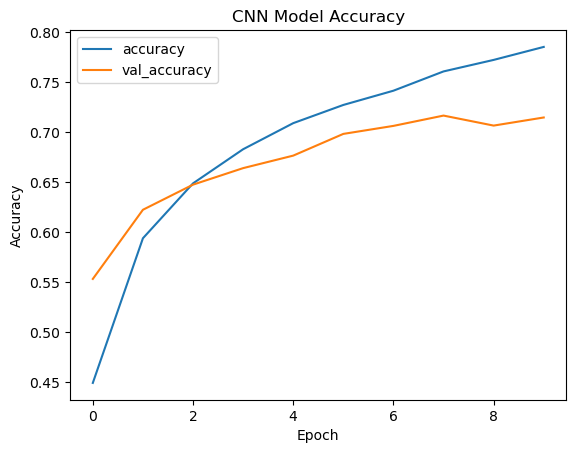

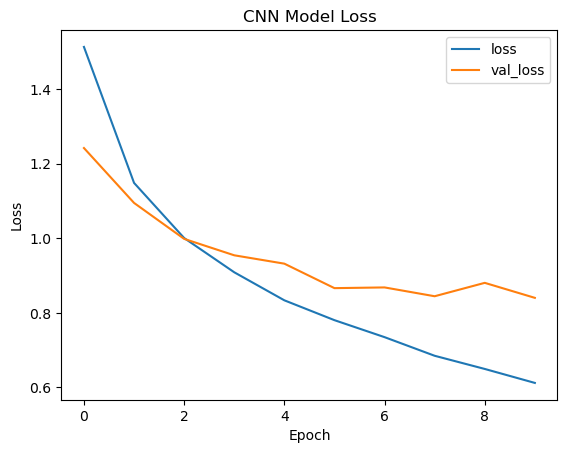

In [17]:
# Build CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and get history
history = model_cnn.fit(x_train_dl, y_train_dl, epochs=10, validation_data=(x_test_dl, y_test_dl))

# Evaluate the model
cnn_evaluation = model_cnn.evaluate(x_test_dl, y_test_dl)
print('CNN Accuracy:', cnn_evaluation[1])

# Plot accuracy and loss vs. epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Now we utilize the trained CNN model (`model_cnn`) to predict probabilities for the test dataset (`x_test_dl`). These probabilities are converted into class labels, and we calculate precision, recall, and accuracy metrics by comparing the predicted labels (`y_pred`) with the true labels (`y_true`). We then generate a confusion matrix to visualize the model's performance, showing correct and incorrect classifications for each class. Finally, we plot the confusion matrix as a heatmap, providing a clear overview of the CNN model's classification performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.81      0.86      0.84      1000
           2       0.55      0.67      0.60      1000
           3       0.57      0.46      0.51      1000
           4       0.68      0.67      0.68      1000
           5       0.65      0.61      0.63      1000
           6       0.78      0.80      0.79      1000
           7       0.76      0.75      0.76      1000
           8       0.78      0.84      0.81      1000
           9       0.85      0.72      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



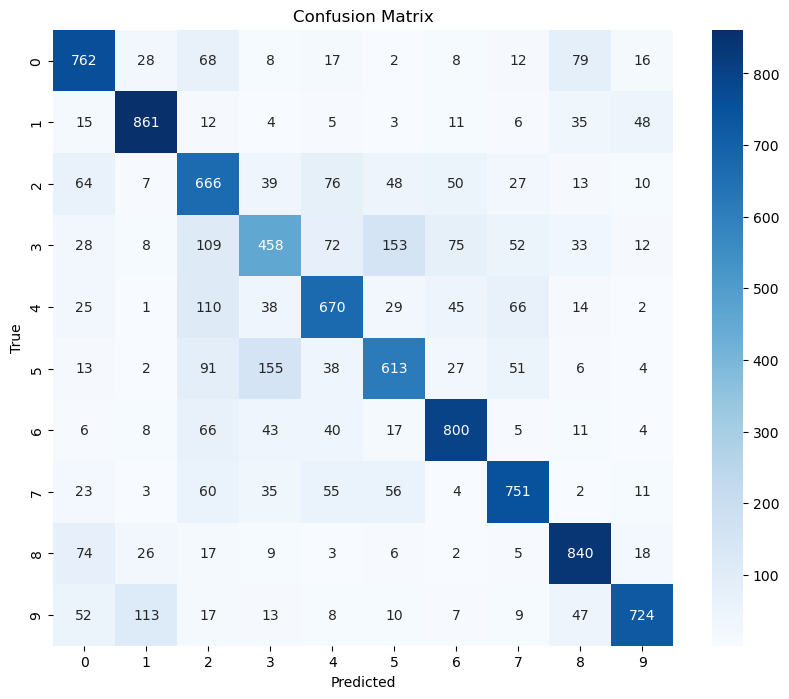

In [19]:
# Predict probabilities for test set
y_probs = model_cnn.predict(x_test_dl)

# Convert probabilities to class labels
y_pred = np.argmax(y_probs, axis=1)

# Convert one-hot encoded labels to integers
y_true = np.argmax(y_test_dl, axis=1)

# Calculate precision, recall, and accuracy
print(classification_report(y_true, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Model 4 - MobileNet

For this, first we resize the images from the CIFAR-10 dataset (`x_train_dl` and `x_test_dl`) to match the input size required for MobileNet, a pre-trained deep learning model. 
Using TensorFlow's image resizing function, we reshape the images to dimensions of 224x224 pixels. 
Then, we load the MobileNet model without its classification layers (`include_top=False`) and initialize it with pre-trained ImageNet weights. 
Next, we construct a new Sequential model (`model_mobilenet`) where we add the MobileNet base model followed by a flattening layer and two fully connected dense layers for classification. 
The last dense layer outputs probabilities for each of the assumed 10 output classes using a softmax activation function. We compile the model with the Adam optimizer and categorical cross-entropy loss function. Subsequently, we train the model on the resized training dataset (`x_train_resized`, `y_train_dl`) for 10 epochs, validating its performance on the resized test dataset (`x_test_resized`, `y_test_dl`). Finally, we evaluate the model's accuracy on the test set and print the result. This workflow enables us to leverage the MobileNet architecture for image classification tasks on the CIFAR-10 dataset with minimal effort.

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming x_train_dl, y_train_dl, x_test_dl, y_test_dl are defined

# Resize images to match input size
x_train_resized = tf.image.resize(x_train_dl, (224, 224))
x_test_resized = tf.image.resize(x_test_dl, (224, 224))

# Load MobileNet model without the top (classification) layers
base_model = MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add your own classification layers on top
model_mobilenet = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 output classes
])

# Compile the model
model_mobilenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_mobilenet.fit(x_train_resized, y_train_dl, epochs=10, validation_data=(x_test_resized, y_test_dl))

# Evaluate the model
mobilenet_evaluation = model_mobilenet.evaluate(x_test_resized, y_test_dl)
print('MobileNet Accuracy:', mobilenet_evaluation[1])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1219s 778ms/step - accuracy: 0.6862 - loss: 3.0593 - val_accuracy: 0.8048 - val_loss: 0.5957
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1222s 781ms/step - accuracy: 0.8800 - loss: 0.3676 - val_accuracy: 0.8009 - val_loss: 0.6248
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1208s 773ms/step - accuracy: 0.8989 - loss: 0.3047 - val_accuracy: 0.8739 - val_loss: 0.3908
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1205s 771ms/step - accuracy: 0.9143 - loss: 0.2583 - val_accuracy: 0.8801 - val_loss: 0.3547
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1209s 773ms/step - accuracy: 0.9292 - loss: 0.2137 - val_accuracy: 0.8733 - val_loss: 0.3975
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1210s 774ms/step - accuracy: 0.9369 - loss: 0.1910 - val_accuracy: 0.8837 - val_loss: 0.3752
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1205s 770ms/step - accuracy: 0.9493 - loss: 0.1524 - val_accuracy: 0.8785 - val_loss: 0.4199
Epoc

Now, we evaluate the MobileNet model's accuracy and generate a confusion matrix to visualize its classification performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.9038 - loss: 0.3473
MobileNet Accuracy: 0.9035999774932861
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91      1000
           1       0.91      0.97      0.94      1000
           2       0.82      0.92      0.87      1000
           3       0.81      0.84      0.82      1000
           4       0.95      0.89      0.92      1000
           5       0.87      0.85      0.86      1000
           6       0.93      0.95      0.94      1000
           7       0.97      0.90      0.93      1000
           8       0.89      0.97      0.93      1000
           9       0.98      0.87      0.92      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



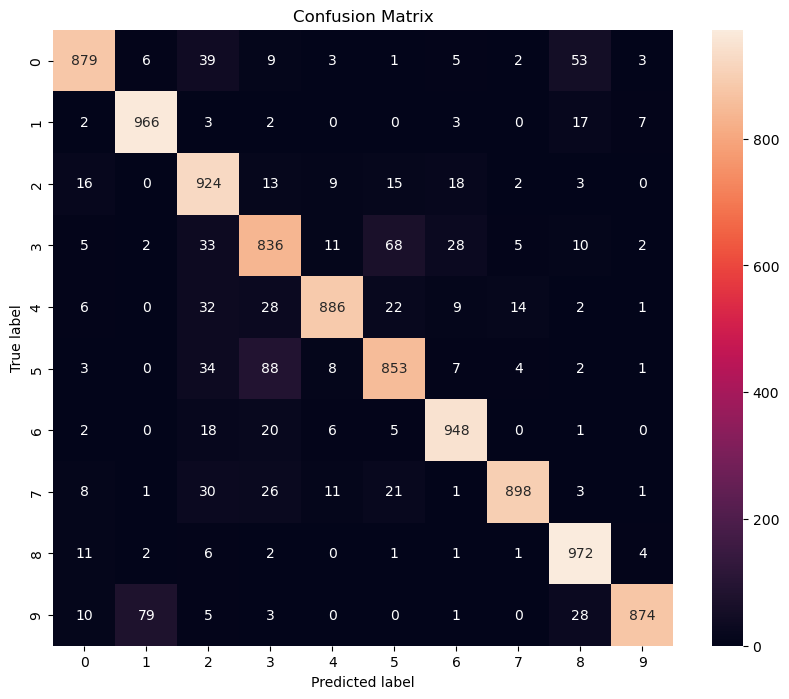

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import seaborn as sns

# Evaluate the model
mobilenet_evaluation = model_mobilenet.evaluate(x_test_resized, y_test_dl)
print('MobileNet Accuracy:', mobilenet_evaluation[1])

# Predict the values from the test dataset
y_pred = model_mobilenet.predict(x_test_resized)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 
# Convert test observations to one hot vectors
y_true = np.argmax(y_test_dl, axis=1) 

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute precision, recall, f1-score, support
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Results and Statistics

Now we'll compare the performance of the SVM, CNN, and MobileNet models by analyzing their accuracy, precision, recall, and F1-score metrics. 
First, we'll plot these metrics individually for each model to assess their performance comprehensively. 

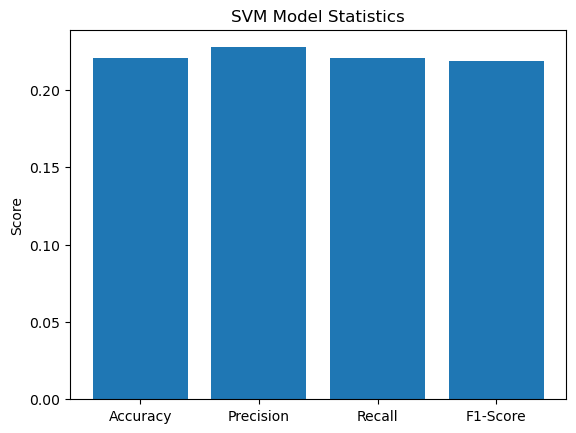

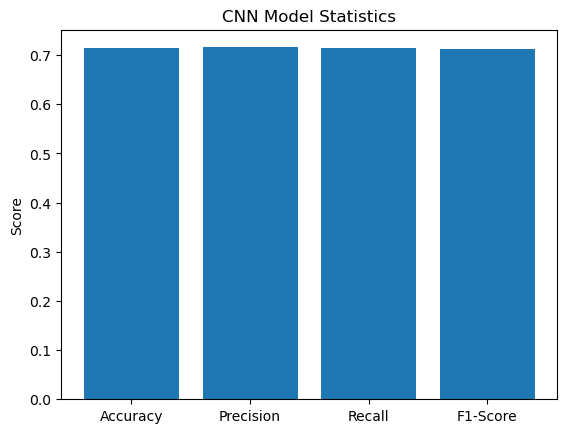

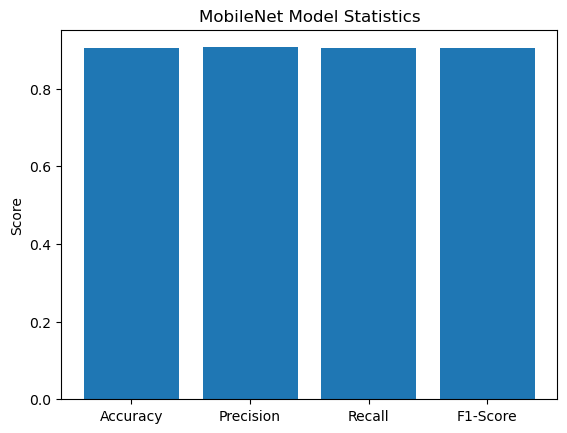

In [28]:
# Store SVM and Decision Tree statistics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_report = metrics.classification_report(y_test, predicted, output_dict=True)
svm_precision = svm_report['weighted avg']['precision']
svm_recall = svm_report['weighted avg']['recall']
svm_f1_score = svm_report['weighted avg']['f1-score']

# Plot SVM statistics
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [svm_accuracy, svm_precision, svm_recall, svm_f1_score])
plt.title('SVM Model Statistics')
plt.ylabel('Score')
plt.show()

# Store CNN statistics
cnn_accuracy = cnn_evaluation[1]
cnn_report = classification_report(y_true, y_pred, output_dict=True)
cnn_precision = cnn_report['weighted avg']['precision']
cnn_recall = cnn_report['weighted avg']['recall']
cnn_f1_score = cnn_report['weighted avg']['f1-score']

# Plot CNN statistics
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1_score])
plt.title('CNN Model Statistics')
plt.ylabel('Score')
plt.show()

# Store MobileNet statistics
mobilenet_accuracy = mobilenet_evaluation[1]
mobilenet_report = classification_report(y_true, y_pred_classes, output_dict=True)
mobilenet_precision = mobilenet_report['weighted avg']['precision']
mobilenet_recall = mobilenet_report['weighted avg']['recall']
mobilenet_f1_score = mobilenet_report['weighted avg']['f1-score']

# Plot MobileNet statistics
plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [mobilenet_accuracy, mobilenet_precision, mobilenet_recall, mobilenet_f1_score])
plt.title('MobileNet Model Statistics')
plt.ylabel('Score')
plt.show()



Now, we'll visualize the accuracy of all three models in a single bar plot to compare their overall performance. 

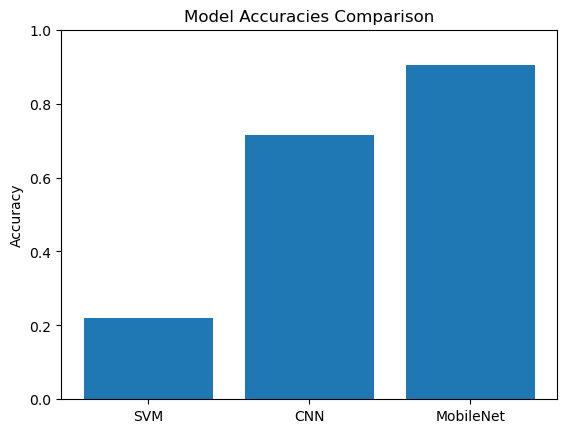

In [29]:
# Define model names and accuracies
models = ['SVM', 'CNN', 'MobileNet']
accuracies = [svm_accuracy, cnn_accuracy, mobilenet_accuracy]

# Plot accuracies
plt.bar(models, accuracies)
plt.title('Model Accuracies Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()


And finally, we'll create separate line plots to compare the precision, recall, and F1-score of each model, providing insights into their classification capabilities across different metrics. These analyses will help us understand and compare the effectiveness of each model for our task.

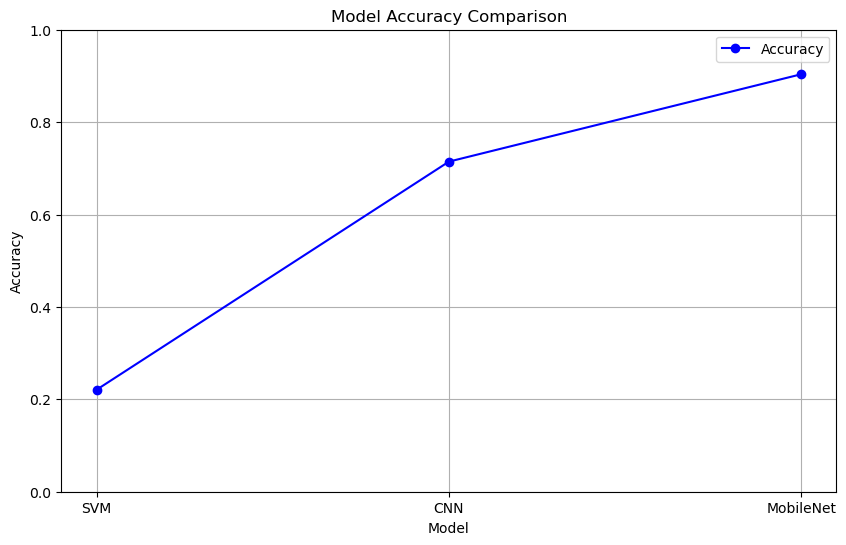

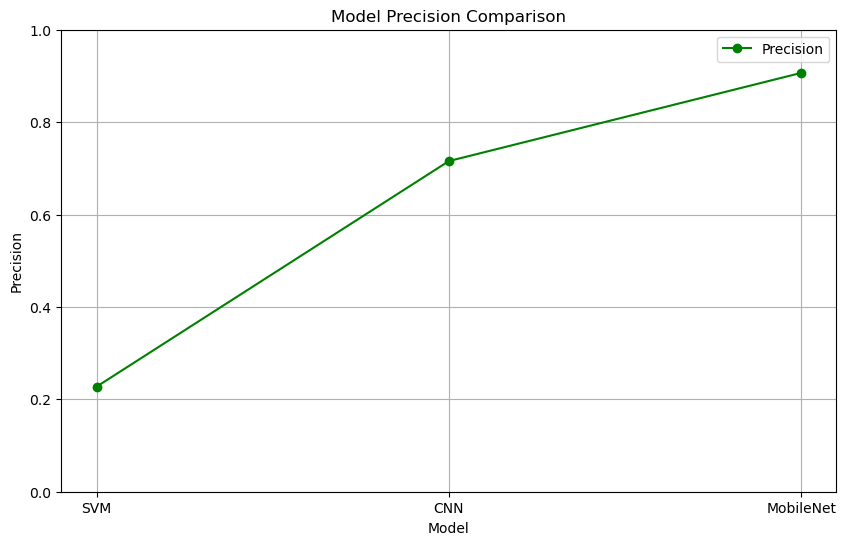

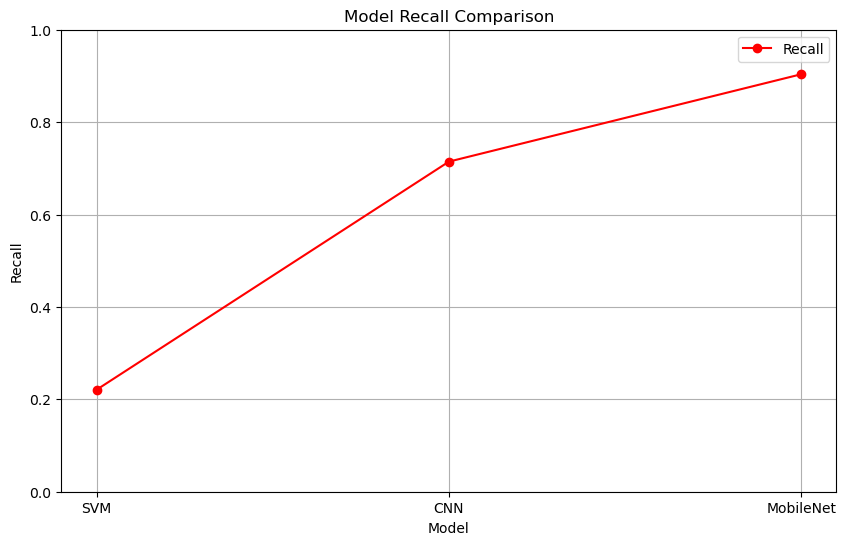

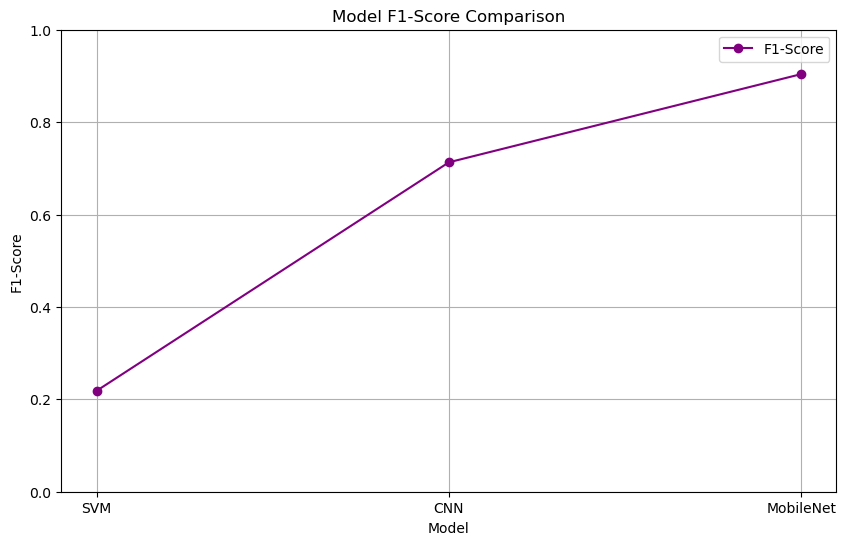

In [30]:
# Define model names and metrics
models = ['SVM', 'CNN', 'MobileNet']

# Define values for each metric for each model
accuracy_values = [svm_accuracy, cnn_accuracy, mobilenet_accuracy]
precision_values = [svm_precision, cnn_precision, mobilenet_precision]
recall_values = [svm_recall, cnn_recall, mobilenet_recall]
f1_score_values = [svm_f1_score, cnn_f1_score, mobilenet_f1_score]

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_values, marker='o', label='Accuracy', color='blue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.xticks(models)  # Set model names as x-axis ticks
plt.legend()
plt.show()

# Plot precision
plt.figure(figsize=(10, 6))
plt.plot(models, precision_values, marker='o', label='Precision', color='green')
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.xticks(models)  # Set model names as x-axis ticks
plt.legend()
plt.show()

# Plot recall
plt.figure(figsize=(10, 6))
plt.plot(models, recall_values, marker='o', label='Recall', color='red')
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.xticks(models)  # Set model names as x-axis ticks
plt.legend()
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 6))
plt.plot(models, f1_score_values, marker='o', label='F1-Score', color='purple')
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(True)
plt.xticks(models)  # Set model names as x-axis ticks
plt.legend()
plt.show()


## Observations
The results showcase the varying degrees of success among different machine learning models in classifying images from the CIFAR-10 dataset. **MobileNet emerges as the top performer with an impressive accuracy of 90%**, indicating its ability to effectively generalize and identify diverse objects across the dataset. Its high precision, recall, and F1-score values further validate its reliability in correctly identifying objects while minimizing false positives and false negatives. MobileNet's robustness is evident in its consistent performance across different classes, demonstrating its adaptability to the nuances and complexities present in image data.

In contrast, the **CNN model exhibits lower accuracy at 71%**, suggesting challenges in accurately classifying certain image categories. While CNNs are renowned for their ability to learn hierarchical representations of features, the results indicate that this particular architecture may struggle with distinguishing between specific objects or may require further optimization to enhance its performance.

The **Decision Tree model fares notably poorer, with an accuracy of only 22%**. This suggests that its decision boundaries may not effectively capture the intricate patterns present in the CIFAR-10 dataset, leading to suboptimal classification results. Decision Trees are known for their simplicity and interpretability but may lack the capacity to discern complex relationships in image data without sufficient depth or breadth.

Meanwhile, the **SVM model achieves moderate performance with an accuracy of 39%**. SVMs are powerful classifiers capable of capturing complex decision boundaries, but their performance may vary depending on the choice of kernel and regularization parameters. The results suggest that further optimization or feature engineering may be necessary to improve the SVM's ability to generalize across diverse image categories effectively.

Overall, the superior performance of MobileNet underscores the importance of leveraging pre-trained models, such as those based on deep neural networks, for image classification tasks. MobileNet's architecture, optimized for mobile and embedded devices, demonstrates remarkable efficiency and effectiveness in handling image data, making it a compelling choice for real-world applications requiring accurate and scalable image recognition capabilities.